        CHAPTER 1 EXPLORATORY DATA ANALYSIS          

             LOCATION ESTIMATATION USING MEAN .. TRIMMED MEAN AND MEDIAN 

Location estimation of the population and murder rates

In [1]:
import pandas as pd
import scipy.stats as sp
import numpy as np


Loading Data set

In [2]:
dat_path= '/home/anish/plan/stats/practical-statistics-for-data-scientists-master/data/state.csv'
data=pd.read_csv(dat_path)


The mean is bigger than the trimmed mean, which is bigger than the median 

This is because the trimmed mean excludes the largest and smallest five states
(trim=0.1 drops 10% from each end)

In [3]:
pop_mean=data['Population'].mean()
pop_trimmed_mean=sp.trim_mean(data['Population'],0.1)
pop_median=data['Population'].median()
print(f'mean: {pop_mean} , trim mean : {pop_trimmed_mean} , median : {pop_median}')

mean: 6162876.3 , trim mean : 4783697.125 , median : 4436369.5


Weighted mean is available with NumPy. For weighted median, we can use the specialized package wquantiles

In [4]:
weight_mean=np.average(data['Murder.Rate'],weights=data['Population'])
import wquantiles as wq
weight_median=wq.median(data['Murder.Rate'],weights=data['Population'])
print(f'weight_mean: {weight_mean} , weight_median : {weight_median}')


weight_mean: 4.445833981123393 , weight_median : 4.4


ESTIMATION OF VARIABILITY

The standard deviation is almost twice as large as the MAD . This is not surprising
since the standard deviation is sensitive to outliers.

In [5]:
std= data['Population'].std()
IQR= data['Population'].quantile(0.75)-data['Population'].quantile(0.25)

from  statsmodels import robust
mad =robust.scale.mad(data['Population'])

print(f'standard devaition {std} is greater than median absolute deviation MAD {mad} and population iqr is {IQR}')




standard devaition 6848235.347401142 is greater than median absolute deviation MAD 3849876.1459979336 and population iqr is 4847308.0


'''• Variance and standard deviation are the most widespread and routinely reported
statistics of variability.
• Both are sensitive to outliers.
• More robust metrics include mean absolute deviation, median absolute deviation
from the median, and percentiles (quantiles)'''

      EXPLORING THE DATA DISTRIBUTION         

        PERCENTILE AND BOXPLOTS           

Murder.Rate is a feature where it signifies murder rate per 100,000 people


The median(50th percentile is always a median) is 4 murders per 100,000 people, although there is quite a bit of variability: the 5th percentile is only 1.6 and the 95th percentile is 6.51

0.05      689529.00
0.25     1833004.25
0.50     4436369.50
0.75     6680312.25
0.95    19118545.60
Name: Population, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7f3e6cd3f2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3e6cd3f6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3e6cd3f040>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3e6cd3fc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3e6cd3feb0>],
 'means': []}

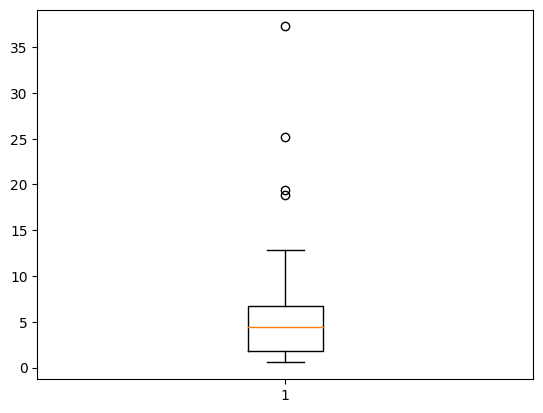

In [6]:
from matplotlib import pyplot as plt 

print(data['Population'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))
plt.boxplot(data['Population']/1000000)


0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7f3e6cdadf60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3e6ac62e00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3e6ac62aa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3e6ac63340>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3e6ac635e0>],
 'means': []}

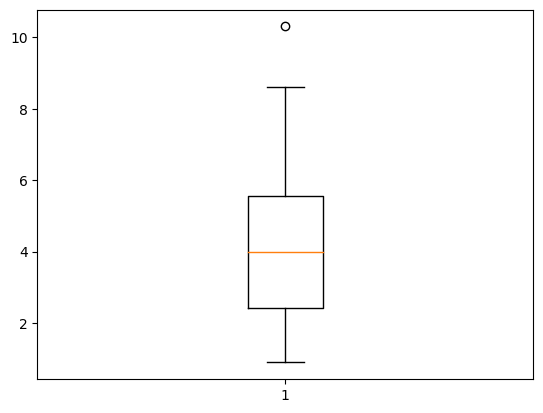

In [7]:
print(data['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))
plt.boxplot(data['Murder.Rate'])

The top and bottom of the box are the 75th and 25th percentiles. The median is shown by the horizontal line in the box

The straight lines below and above the box , referred to as whiskers, extend from the top and bottom of the box to indicate the range for the bulk of the data

By default,the whiskers extends to the furthest point beyond the box, that will not go beyond 1.5 times the IQR

Any data outside of the whiskers is plotted as single points or circles are considered as outliers

 

                 FREQUENCY TABLE AND HISTOGRAM                

frequency tables - compute range and divide the range into bins(width) parts

In [8]:
binpop = pd.cut(data['Population'],10)
print(binpop.value_counts())
'pd.cut is used to create series that maps the values into segments'


(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64


'pd.cut is used to create series that maps the values into segments'

histograms - is a way to visualize a frequency table

(array([24., 14.,  6.,  2.,  1.,  1.,  1.,  0.,  0.,  1.]),
 array([  563626.,  4232659.,  7901692., 11570725., 15239758., 18908791.,
        22577824., 26246857., 29915890., 33584923., 37253956.]),
 <BarContainer object of 10 artists>)

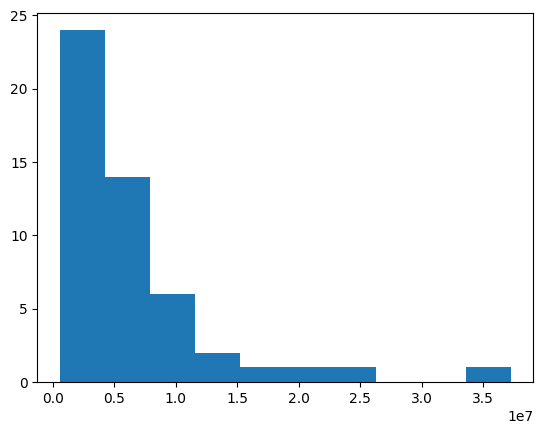

In [9]:
plt.hist(data['Population'],10)

In statistical theory, location and variability are referred to as the first and second moments of a distribution

The third and fourth moments are called skewness and kurtosis. Skewness refers to whether the data is skewed to larger or smaller values, and kurtosis indicates the propensity of the data to have extreme values metrics are not used to measure skewness and kurtosis;
instead, these are discovered through visual displays

          DENSITY PLOTS AND ESTIMATES     

Related to the histogram is a density plot, which shows the distribution of data values as a continuous line. A density plot can be thought of as a smoothed histogram,although it is typically computed directly from the data through a kernel density estimate

(array([ 5., 10.,  8.,  7.,  9.,  8.,  1.,  0.,  1.,  1.]),
 array([ 0.9 ,  1.84,  2.78,  3.72,  4.66,  5.6 ,  6.54,  7.48,  8.42,
         9.36, 10.3 ]),
 <BarContainer object of 10 artists>)

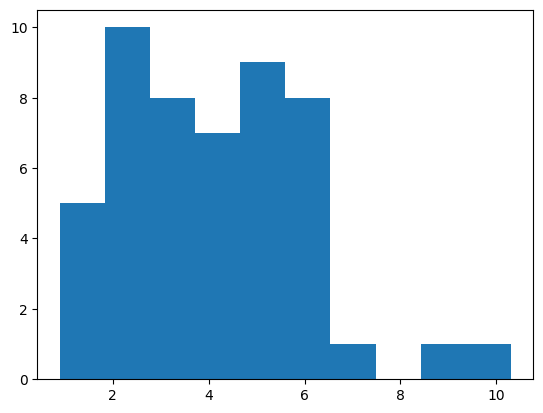

In [10]:
plt.hist(data['Murder.Rate'],bins=10)

<AxesSubplot: xlabel='Murder.Rate', ylabel='Density'>

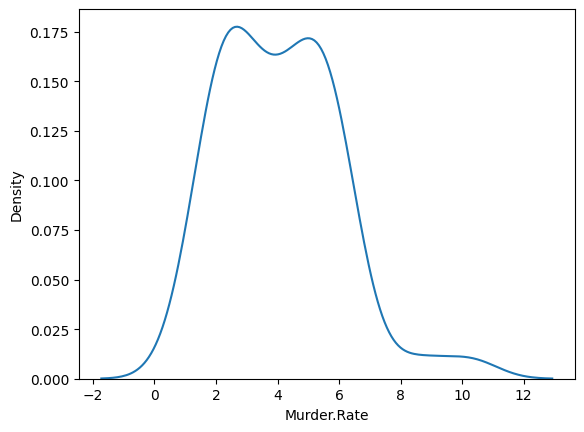

In [11]:
import seaborn as sns
sns.kdeplot(data['Murder.Rate'])

A density plot corresponds to plotting the histogram as a proportion rather than counts

the total area under
the density curve = 1, and instead of counts in bins you calculate areas under the
curve between any two points on the x-axis, which correspond to the proportion of
the distribution lying between those two points

       Exploring Binary and Categorical Data

<AxesSubplot: >

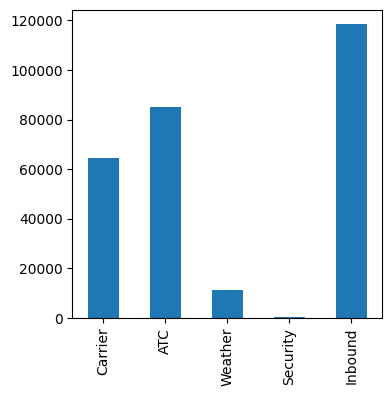

In [12]:
dat_path='/home/anish/plan/stats/practical-statistics-for-data-scientists-master/data/dfw_airline.csv'
air_delay=pd.read_csv(dat_path)
air_delay.transpose().plot.bar(figsize=(4, 4), legend=False)

Note that a bar chart resembles a histogram; in a bar chart the x-axis represents different categories of a factor variable, while in a histogram the x-axis represents values of a single variable on a numeric scale

Here factor variable is delay and category is the diffrent causes of the delay

Histogram is just that plot of freqency table example murderrate as a factor variable and it count of values in particular bin

Histogram x axis is the ordered category like 1,2,3,4,5 bins .....   bar plot x axis is not ordered category

      MODE     

The mode is the value that appears most often in the data. In the above example of delay the most common type of delay is 'INBOUND'

MODE is generally used for categorical data than the numeric data

    CORRELATION Scatter plot and heatmap

Variables X and Y (each with measured data) are said to be positively correlated if high values of X go with high values of Y, and low values of X go with low values of Y. If high values of X go with low values of Y, and vice versa, the variables are negatively correlated.

correlation coofeicitent ranges from -1 to 1 ....and correlaton matrix gives the same in matrix forms with mix of one to one comparison of features ..... scatterplot is the plot of one to one comaprision of each value of one feature to the corresponding value of the another feature 

correlation is the vector form ..so it has direction v1:{1,2,3} v2:{4,5,6} vector product is 1x4 + 2x5 ...
Variables can have an association that is not linear, in which case the correlation coefficient may not be a useful metric.

/tmp/ipykernel_8106/2693461179.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=sp.corr()


<AxesSubplot: >

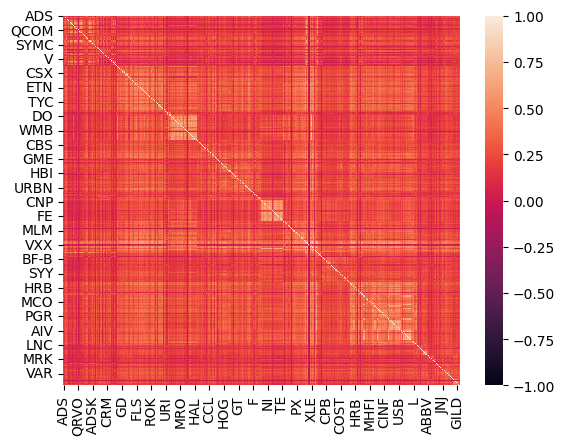

In [13]:
dat_path='/home/anish/plan/stats/practical-statistics-for-data-scientists-master/data/sp500_data.csv'
sp=pd.read_csv(dat_path)
corr=sp.corr()
sns.heatmap(corr,vmin=-1,vmax=1)


scatter plot -Scatterplots are fine when there is a relatively small number of data values. The plot of stock returns involves only about 750 points. 

Higher the points the more dense it will become hence another plots have to be used 

<AxesSubplot: xlabel='T', ylabel='VZ'>

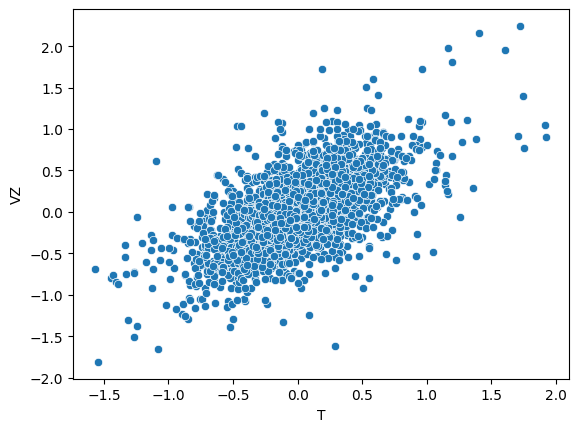

In [14]:
sns.scatterplot(x=sp['T'],y=sp['VZ'])

The returns have a positive relationship: while they cluster around zero, on most days, the stocks go up or go down in tandem (upper-right and lower-left quadrants).
There are fewer days where one stock goes down significantly while the other stock goes up, or vice versa (lower-right and upper-left quadrants).

      EXPLORING TWO OR MORE VARIABLES  

Mean..variance and std deviation are all analysis of the single feature -- single analysis 
              
From correlation it compare the two variables hence ---it is bivariate analysis  

if we compare two or more feature -- then it is multivariate analysis

    HEXAGONAL BINNING PLOT AND CONTOURS (NUMERIC VS NUMERIC DATA) 

Hexagonal binning plotting takes two feature and instead of plotting every point like scatter plot

it will create hexagonal bin and colour of that bin show the count of the points (density)

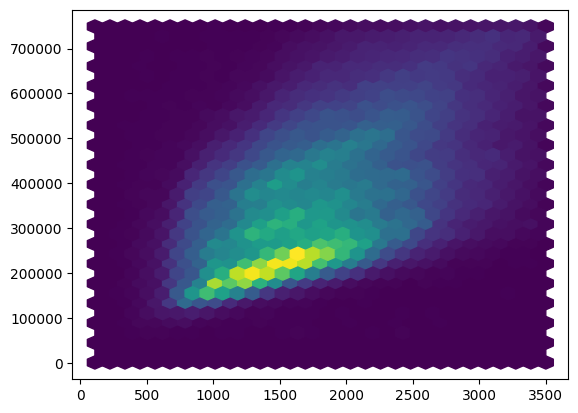

In [15]:
path = '/home/anish/Downloads/practical-statistics-for-data-scientists-master/data/kc_tax.csv'
kc_tax=pd.read_csv(path)
kc_tax=kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &(kc_tax.SqFtTotLiving > 100) &(kc_tax.SqFtTotLiving < 3500), :]
plt.hexbin(x=kc_tax['SqFtTotLiving'],y=kc_tax['TaxAssessedValue'],gridsize=30)


An interesting feature is the hint of additional bands above the main (darkest) band at the bottom, indicating homes that have the same square
footage as those in the main band but a higher tax-assessed value

Other types of charts are used to show the relationship between two numeric variables, including heat maps. Heat maps, hexagonal binning, and contour plots all givea visual representation of a two-dimensional density. 

In this way, they are natural analogs to histograms and density plots

     Two Categorical Variables

    CONTINGENCY TABLE

CONTINENCY TABLE -a table of counts by category

In [20]:
path = '/home/anish/plan/stats/practical-statistics-for-data-scientists-master/data/lc_loans.csv'
lc_loans=pd.read_csv(path)
lc_loans

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B
...,...,...
450956,Current,D
450957,Current,D
450958,Current,D
450959,Current,D


In [30]:
crosstab = lc_loans.pivot_table(index='grade', columns='status',aggfunc=lambda x: len(x), margins=True)

print(crosstab)

df = crosstab.loc['A':'G',:].copy()
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'],axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df

perc_crosstab

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


The margins keyword argument will add the column and row sums.

We create a copy of the pivot table, ignoring the column sums.

We divide the rows with the row sum

We divide the 'All' column by its sum

      CATEGORICAL AND NUMERIC DATA COMPARISION

Boxplots are a simple way to visually compare the distributions of a numeric variable grouped according to a categorical
variable. 

For example, we might want to compare how the percentage of flight delays varies across airlines.

<AxesSubplot: title={'center': 'pct_carrier_delay'}, xlabel='airline'>

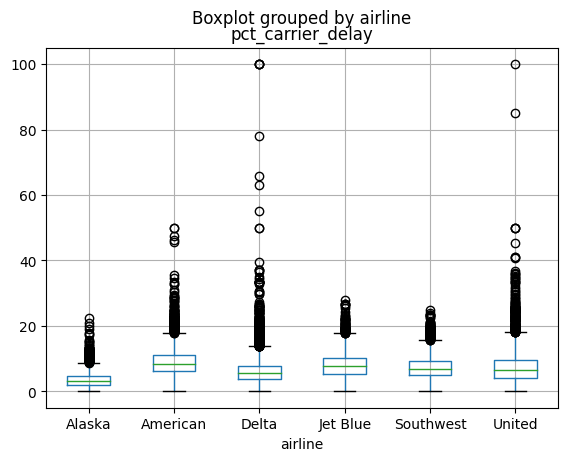

In [44]:
path = '/home/anish/plan/stats/practical-statistics-for-data-scientists-master/data/airline_stats.csv'
airline_stats=pd.read_csv(path)
airline_stats.boxplot(by='airline',column='pct_carrier_delay')


A violin plot,is an enhancement to the boxplot and plots the density estimate with the density on the y-axis. The density is mirrored and flipped over, and the resulting shape is filled in, creating an image resembling a violin. The advantage of a violin plot is that it can show nuances in the distribution that aren’t perceptible in a boxplot

<AxesSubplot: xlabel='airline', ylabel='pct_carrier_delay'>

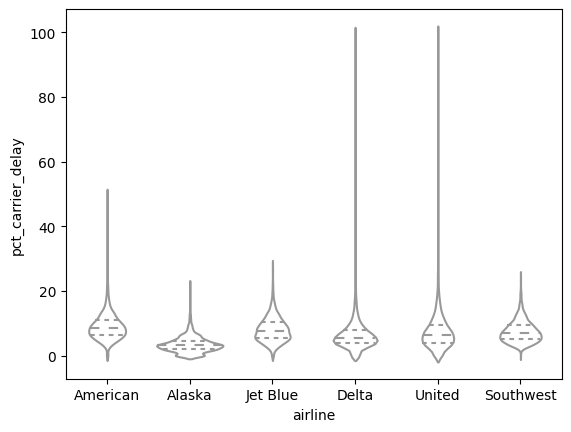

In [45]:
sns.violinplot(x=airline_stats.airline, y=airline_stats.pct_carrier_delay,inner='quartile', color='white')

The advantage of a violin plot is that it can show nuances in the distribution that aren’t perceptible in a boxplot. On the other hand, the boxplot more clearly shows the outliers in the data

    Visualizing Multiple Variables

seaborns facegrid is used to view multiple graphs

boxplot ,heatmap,hexabins are used to visualizing multiple variable also

arguments col and row to specify the conditioning variables : that is each graph is seperated by unique value of the feature here condition variable is the zip code

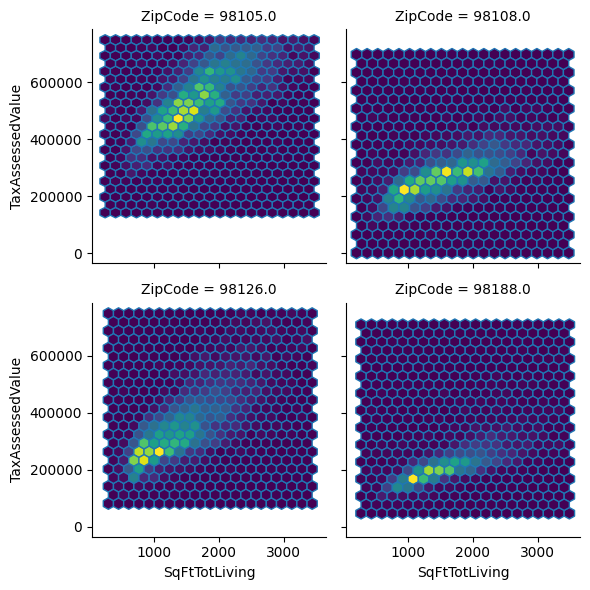

In [60]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax.loc[kc_tax.ZipCode.isin(zip_codes),:]

graph=sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
def hex(x,y,**kwargs):
    plt.hexbin(x,y,gridsize=20,**kwargs)

graph.map(hex,'SqFtTotLiving','TaxAssessedValue')